---
title: "Sales Data Analysis Report"
author: "Pham Quang Huy"
date: "2024-10-31"
format: pdf
# format:
#    html: 
#      encoding: 'UTF-8'
#      theme: style.css
# jupyter: python3
crossref:
    lof-title: "List of Figures"
---



# Sales Data Analysis Report

## 1. Introduction

Thi individual reports tracks the instructional video titled ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks.git) by [Keith Galli](https://youtu.be/eMOA1pPVUc4?si=-UXWLdSFktCLWSh5). Through power of [Quarto](https://quarto.org/docs/visual-editor/vscode/). Utilizing the capabilities of Quarto, I present the final product of a story telling report designed to showcase practices and engage the audience seamlessly.

In this 'Sales Data Analysis,' I apply foundational exploratory data skills in data science (using Python Pandas and Matplotlib) to follow the instructional material within a single *Jupyter notebook* file. The goal is to familiarize myself with **multiple files** of monthly records (*./Sales_Data*) and consolidate them into one **.csv** file. By learning through hands-on experience, I employ critical thinking and create a notebook that highlights significant insights while incorporating data visualization to impact the electronic retail sector.

## 2. Data Overview

In the competitive retail landscape, data is essential for understanding customer preferences and refining sales strategies. Various insights are critical for business decisions, including sales trends over time and standout products.

The data reveals an inverse relationship between 'Sale Quantity' and 'Price Each', indicating that consumers tend to purchase more affordable items, such as accessories, rather than high-cost items like laptops and household electronics. The correlation between low-priced products and their higher sales volume suggests the effectiveness of comparing average prices.

![Figure 1: Subplot of price each items over the quantity of products in total](/Output/PriceQuantityComparision.png){fig-alt="A bar chart illustrating the number of orders per product with an overlaid line plot of average price for each item. The green bars represent quantity ordered, while the blue line indicates average price in dollars. This visualization helps identify popular items and their price points, illustrating that lower-priced items like batteries have higher sales volumes, while premium products like the MacBook Pro see fewer orders."}

Exceptions in this chart include office products like the MacBook Pro and ThinkPad, which may reflect other factors influencing customer demand or the investment cycle in new products. The insights derived from the sales data, inspired by Keith Galli's tutorial, are crucial for uncovering trends such as peak sales periods, best-selling products, and strategies to enhance sales.
### a/ Data Description

The data sources depict set of data in 12 months of electrical stores named "Keith's SuperDuper cool electronics". The folder 'data' contains 12 separate `.csv` files each representing sales data from different stores across the months of the year.

### b/ Data Loading

In the video, the initial data integration resulted in a single unified `.csv` file that combines the 12 months of sales data. The merging process reads files ending with `.csv`. The author/youtuber's rationale is to create a comprehensive dataset for detailed analysis.

An important practice involves importing the necessary libraries.

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "./Sales_Data"
files = [file for file in os.listdir(path) if file.endswith('.csv')]

all_data = pd.DataFrame()

for file in files:
    file_read = pd.read_csv(path + "/" + file)
    all_data = pd.concat([all_data, file_read])

all_data.to_csv("all_data.csv", index=False)

## 3. Exploratory Data Analysis and Insights

The `all_data.csv`, now assigned to the variable `df`, contains a compilation of 12 files. At this stage, all exploratory data methods (e.g. `.describe()`, `.info()`, ...) are applied with following intepretations.

In [71]:
df = pd.read_csv("all_data.csv")
df.info()
df.describe()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB
Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


Data Frame (`df`) used for analysis compounds of 6 columns. The `Order Date` column present date and time. This data columns could help define the months for computation other combination of quantitative information. The 'Product' column contains existing name products ordered per purchase, which could be counted as sum methods to gather attribute of `Price Each`, `Quantity`.

`Purchase Address` indicates delivery good destination. The integration of details show city, state, geographical identification. One the quote of purchase is recorded, the column `Order ID` assigned one code for the buyer order. In video, Keith has implemented the data count distinct for each `Order ID` to get the combination of good come together.

| Column Name | Description |
|--------------------------|----------------------------------------------|
| `Order Date` | Represents the date and time of each order. Useful for extracting information like month, day, and hour. |
| `Product` | Contains the name of products ordered per purchase, allowing for counts and summaries of each product. |
| `Quantity Ordered` | Shows the quantity of each product ordered, used to compute total quantities and sales per product. |
| `Price Each` | Indicates the price of each product at the time of purchase, used for calculating total sales. |
| `Purchase Address` | Specifies the delivery address, including city, state, and other geographical identifiers. Useful for analyzing sales distribution by location. |
| `Order ID` | Unique identifier assigned to each order, which allows counting distinct orders and analyzing product combinations bought together. |

### a/ Preprocessing Data

The data summary from the primary data interpretation shows shows no missing data from the six columns including 04 categorical data (OrderID, Product, Order Date, Purchase Address), 02 numerical data (Quantity Ordered, Price Each). Otherwise, the nulls values presents all over 6 columns and takes small proportion of values (0.2%).

The priority is to find rows of NAN values rows and watch over all numeric data columns. The visualization shows below.

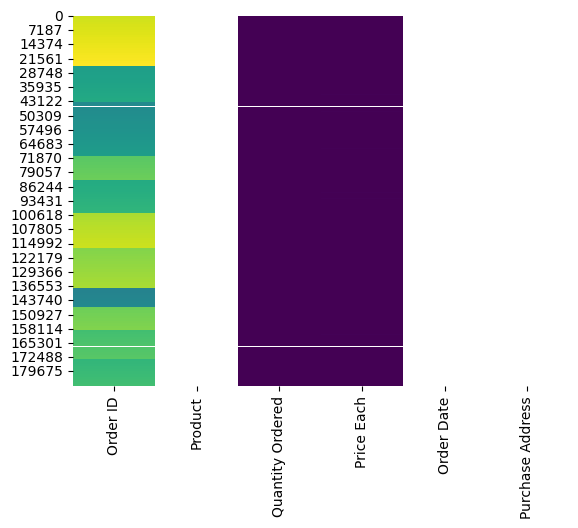

In [72]:
## Visualize missing values

import seaborn as sns

if df.isnull().values.any(): 
    numeric_df = df.apply(pd.to_numeric, errors='coerce')
    sns.heatmap(numeric_df[numeric_df.isnull().any(axis=1)], cbar=False, cmap='viridis')
else:
    print("No missing values to visualize.")

*Figure 2: Heatmap Visualizing Missing Values in Dataset*

In [73]:
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df = df.dropna(axis=0)
df.head

<bound method NDFrame.head of        Order ID                 Product Quantity Ordered Price Each  \
0        295665      Macbook Pro Laptop                1       1700   
1        295666      LG Washing Machine                1      600.0   
2        295667    USB-C Charging Cable                1      11.95   
3        295668        27in FHD Monitor                1     149.99   
4        295669    USB-C Charging Cable                1      11.95   
...         ...                     ...              ...        ...   
186845   222905  AAA Batteries (4-pack)                1       2.99   
186846   222906        27in FHD Monitor                1     149.99   
186847   222907    USB-C Charging Cable                1      11.95   
186848   222908    USB-C Charging Cable                1      11.95   
186849   222909  AAA Batteries (4-pack)                1       2.99   

            Order Date                        Purchase Address  
0       12/30/19 00:01  136 Church St, New York City

In [75]:
# Remove rows with text in 'Order Date'
df = df[df['Order Date'].str[0:2] != 'Or']

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/1978847972.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/1978847972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


3.  **Convert Columns to Correct Data Types:** Ensure `Quantity Ordered` and `Price Each` are numeric, as they may currently be strings due to initial data loading.

In [76]:
# Convert to numeric
df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/1145951463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')


4.  **Extract Month from 'Order Date':** We can extract the month from the `Order Date` column to analyze monthly sales patterns.

In [77]:
df['Month'] = df['Order Date'].dt.month

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/619181629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].dt.month


5.  **Create a City Column:** The `Purchase Address` column contains city and state information, which we can extract for location-based analysis. Using functions allows flexibility for complex address formats.

In [78]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/4191916273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


## 4. Analysis and Insights

With a clean dataset, we’re ready to perform deeper analysis to uncover patterns and insights. The following sections could cover key insights, such as peak sales months, popular products, and sales distributions across different cities.

### a/ **What is the best months for sales?**

The question as for analysis on 'Sales' grouped by months. By creating a 'Sales' columns we report products of 'Quantity' and 'Price Each'.

In [79]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/1983597858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


We now can choose the columns to calculate base on new information of 'Sales' column. For monthly sales, we choose the 'Month' and then mathematically group `sum` 'Sales' value by it. Here is the example for query and draw charts columns.

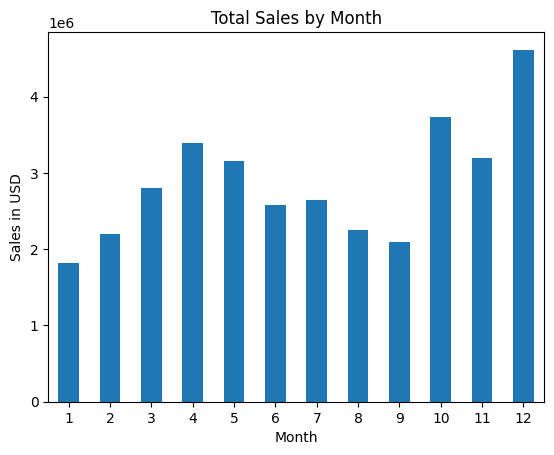

In [80]:
month_sales = df.groupby('Month')['Sales'].sum()
month_sales.plot(kind='bar')
plt.xticks(rotation='horizontal')
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.title('Total Sales by Month')
plt.show()

*Figure 3: Total Sales By Month*

The sales data over the period from **January to December** reveals notable trends in overall sales performance showing **a steady increase in sales** over the year with several **seasonal spikes** in specific months. This pattern suggests growing customer engagement and effective sales strategies, especially during peak periods.

**Monthly Highlights** Certain months stand out for their impact on sales performance:

-   **December** recorded the **highest sales volume**, likely due to the holiday season and year-end promotions, capturing increased consumer spending.

-   **October** saw a significant boost, possibly driven by a targeted sale program or promotion.

-   April to November showed a gradual decline, indicating a stabilization in demand. This may suggest a shift from high initial interest and purchases to more spontaneous or needs-based buying, as customers adjusted after initial seasonal spikes.

### b/ How can businesses leverage the insights from the monthly and quarterly sales analyses to optimize inventory planning and marketing strategies?

**City Sales by Month** To understand the sales distribution across cities for each month, we can use a 100% stacked bar chart to display the proportion of total sales contributed by each city per month.

<Figure size 1400x1000 with 0 Axes>

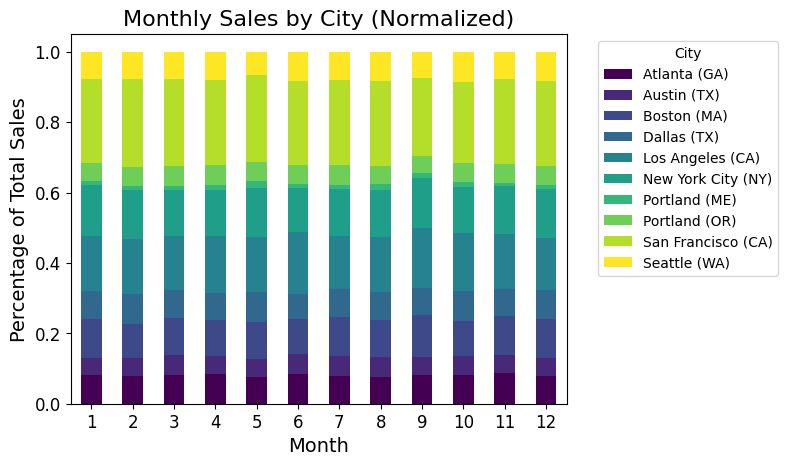

In [81]:
# Calculate monthly sales by city and normalize for 100% stacked bar
city_sales_month_normalized = df.groupby(['Month', 'City'])['Sales'].sum().unstack()
city_sales_month_normalized = city_sales_month_normalized.div(city_sales_month_normalized.sum(axis=1), axis=0)

# Plot the monthly sales by city
plt.figure(figsize=(14, 10))
city_sales_month_normalized.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Monthly Sales by City (Normalized)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Percentage of Total Sales', fontsize=14)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Insights from Monthly Sales** The above chart displays the proportion of each city's sales as a percentage of total monthly sales. This visualization can help identify:

-   **High-Performing Months for Each City:** By observing the bars, we can see months where certain cities (e.g., San Francisco, Los Angeles) dominate sales.
-   **Seasonal Trends:** Certain cities may perform better during specific months, indicating possible seasonality in consumer spending.

**Quarterly Sales Analysis** Next, let's examine quarterly sales by city to understand the overall contribution of each city across quarters, with a focus on identifying the top-performing region in Q1 (Jan–Apr) and in the last three months of the year.

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/1387953142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = df['Order Date'].dt.quarter


<Figure size 1200x800 with 0 Axes>

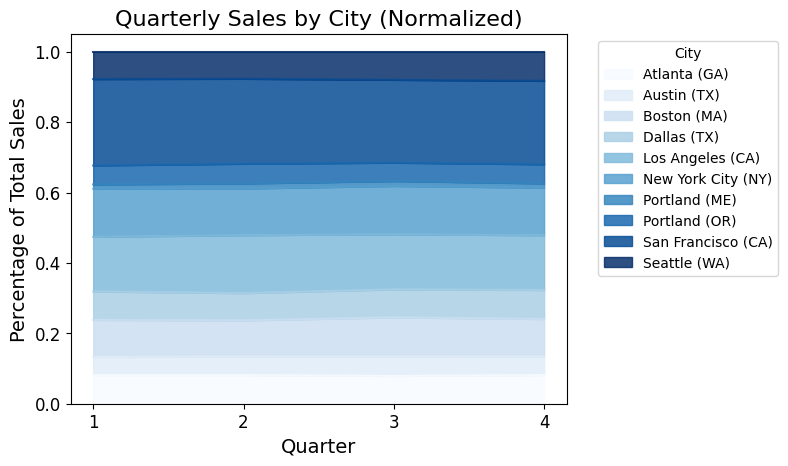

In [82]:
# Add 'Quarter' column to data
df['Quarter'] = df['Order Date'].dt.quarter

# Calculate quarterly sales by city and normalize for 100% stacked bar
city_sales_normalized = df.groupby(['Quarter', 'City'])['Sales'].sum().unstack()
city_sales_normalized = city_sales_normalized.div(city_sales_normalized.sum(axis=1), axis=0)

# Plot quarterly sales by city
plt.figure(figsize=(12, 8))
city_sales_normalized.plot(kind='area', stacked=True, colormap='Blues', alpha=0.85)
plt.title('Quarterly Sales by City (Normalized)', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Percentage of Total Sales', fontsize=14)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.xticks(rotation=0, fontsize=12, ticks=[1, 2, 3, 4])
plt.yticks(fontsize=12)
plt.show()

**Insights from Quaterly Sales** - **Top-Performing Region in Q1:** The chart shows which city contributed the most to total sales in Q1 (Jan–Mar). This insight helps us understand which regions experience strong demand at the start of the year. - **Sales in the Last 3 Months:** Observing the fourth quarter (Oct–Dec) helps identify cities with significant sales contributions, useful for year-end planning and inventory management.

### **Key Takeaways of Sales Trends**

-   **Peak Sales in December:** December recorded the highest sales volume, likely due to holiday season spending and effective year-end promotions. This peak highlights the importance of stock and promotional planning to maximize revenue during high-demand periods.

-   **October Sale Spike:** A noticeable spike in October suggests successful promotional efforts, possibly attracting customers looking for early holiday deals. Businesses may consider launching targeted campaigns during this period to further boost sales.

-   **Lower Mid-year Sales** Sales tend to decline gradually from April through November, indicating a stabilization in consumer demand. This period could benefit from targeted promotions to sustain engagement, encouraging needs-based or spontaneous purchases as customers' enthusiasm from early-year sales tapers off.

-   **Monthly and Quarterly City Sales Patterns:**

    -   **High-Performing Months for Specific Cities:** By examining the distribution of sales across cities on a monthly basis, we can identify high-performing months for particular locations. For instance, some cities, like San Francisco and Los Angeles, may have stronger sales in specific months, hinting at localized seasonality in demand.
    -   **Top-Performing Regions in Q1 and Q4:** Analysis of quarterly data reveals the regions that perform best during Q1 (January–March) and the last quarter (October–December). This insight is valuable for planning region-specific inventory and marketing strategies to maximize regional strengths during these peak times.

### c/ **What city sold the most product?**

For cities, we could focus on deciding group of 'Sales' by 'Cities'. This analysis could presents the sales values and its performance through city.

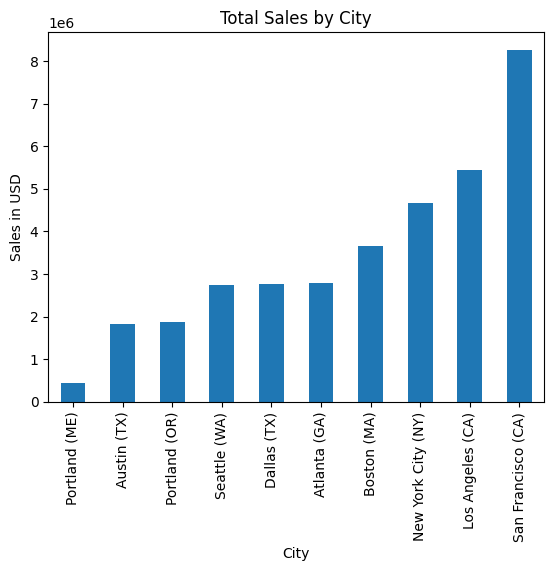

In [83]:
city_sales = df.groupby('City')['Sales'].sum().sort_values()
city_sales.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel('Sales in USD')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.show()

<img src="/Output/Total_Sales_byCity.png" alt="Total Sales By City"/> *Figure 4: Total Sales By City*

**City Comparisons (Sales By City)** Analyzing the sales data across different cities reveals significant variations in performance. By grouping the data by 'City' and calculating the total sales, we can compare the sales volume to identify the highest and lowest performers:

In [84]:
# Calculate total sales per city
city_sales = df.groupby('City')['Sales'].sum().reset_index()

# Display the total sales per city
print(city_sales)

                 City       Sales
0        Atlanta (GA)  2795498.58
1         Austin (TX)  1819581.75
2         Boston (MA)  3661642.01
3         Dallas (TX)  2767975.40
4    Los Angeles (CA)  5452570.80
5  New York City (NY)  4664317.43
6       Portland (ME)   449758.27
7       Portland (OR)  1870732.34
8  San Francisco (CA)  8262203.91
9        Seattle (WA)  2747755.48


| City          | Sales              |
|---------------|--------------------|
| City          | Sales              |
| Atlanta       | \$2,795,738.00     |
| Austin        | \$1,819,582.00     |
| Boston        | \$3,661,642.00     |
| Dallas        | \$2,767,975.00     |
| Los Angeles   | \$5,452,571.00     |
| New York City | \$4,664,756.00     |
| Portland      | \$2,321,016.00     |
| San Francisco | **\$8,262,203.00** |
| Seattle       | \$2,747,532.00     |

: *Table 2: The calculation of the Sales by Cities*

-   **Top-Performing Cities**: San Francisco, Los Angeles, and New York City lead in sales, with San Francisco surpassing \$8 million, followed closely by Los Angeles and New York City.

-   **Low-Performing Cities**: Austin and Portland show the lowest sales figures, possibly due to smaller markets or differing economic conditions.

**Key Insights for Top-Performing Cities and Low-Performance Cities**

-   **San Francisco, Los Angeles, and New York City** are the top-performing cities, with San Francisco leading significantly with over \$8 million in sales. These cities benefit from large, diverse populations, high purchasing power, and strong economic activity.
-   A**ustin and Portland** have the lowest sales figures, likely due to smaller markets or different economic conditions. These cities may represent growth opportunities with targeted marketing efforts.

### d/ What is sales performance by quarter over cities?

To gain deeper insight into sales trends, we analyzed the percentage change in sales for each city by quarter. This helps identify periods of growth or decline and spot seasonal trends.

In [85]:
# Calculate the percentage change in sales for each quarter compared to the previous quarter
df['Quarter'] = df['Order Date'].dt.quarter
city_sales = df.groupby(['City','Quarter'])['Sales'].sum().unstack()
quarter_sales_pct_change = city_sales.pct_change() * 100

# Display the percentage change
print(quarter_sales_pct_change)

Quarter                      1           2           3           4
City                                                              
Atlanta (GA)               NaN         NaN         NaN         NaN
Austin (TX)         -36.968335  -35.760509  -30.741767  -35.465284
Boston (MA)         104.004624   96.356426  103.695641  101.917308
Dallas (TX)         -22.933288  -24.607009  -28.604343  -22.449251
Los Angeles (CA)     91.960027  112.463475   96.710570   88.583386
New York City (NY)  -12.009054  -19.431589  -12.322029  -13.043357
Portland (ME)       -91.098555  -89.209050  -89.871703  -91.102547
Portland (OR)       343.688788  291.244546  275.280554  350.987938
San Francisco (CA)  354.829631  331.199784  351.141192  336.910728
Seattle (WA)        -68.316337  -68.134745  -66.047933  -65.078305


/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/735400936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarter'] = df['Order Date'].dt.quarter


**Insights from Quarterly Sales Trends Across Cities** - **Steady Growth in Major Cities:** Cities like San Francisco and Los Angeles demonstrate steady growth across quarters, indicating consistent demand and strong economic bases. - **Seasonal Declines in Some Cities:** Cities such as Portland and Austin show seasonal drops in certain quarters, likely due to local economic or environmental factors. Understanding these patterns can help businesses adjust marketing and inventory strategies accordingly.

**Visualizing Quarterly Sales Change** The 100% stacked bar chart below displays the percentage change in sales for each city by quarter, highlighting growth or decline.

<Figure size 1200x800 with 0 Axes>

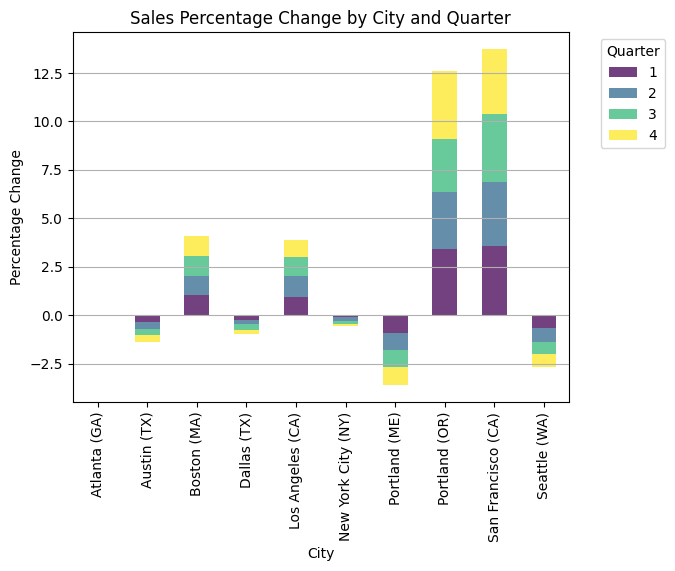

In [86]:
plt.figure(figsize=(12, 8))
quarter_sales_pct_change.div(100).plot(kind='bar', stacked=True, colormap='viridis', alpha=0.75)
plt.title('Sales Percentage Change by City and Quarter')
plt.xlabel('City')
plt.ylabel('Percentage Change')
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.show()

### e/ What products sales are prominent due to the cities sales?

This section explores product demand across different categories and cities to identify popular products, understand regional preferences, and infrom inventory planning. By visualizing products purchased per Order ID by city, we can uncover city-specific preferences for particular products and categories. This includes examining sales data to determine top selling and low-selling products, observing consumer behavior trends, and making recommendations for inventory optimization by the region.

In the following code, the analyse involve generating visualizations such as heatmap and pivot tables to illustrate product popularity by category and city.

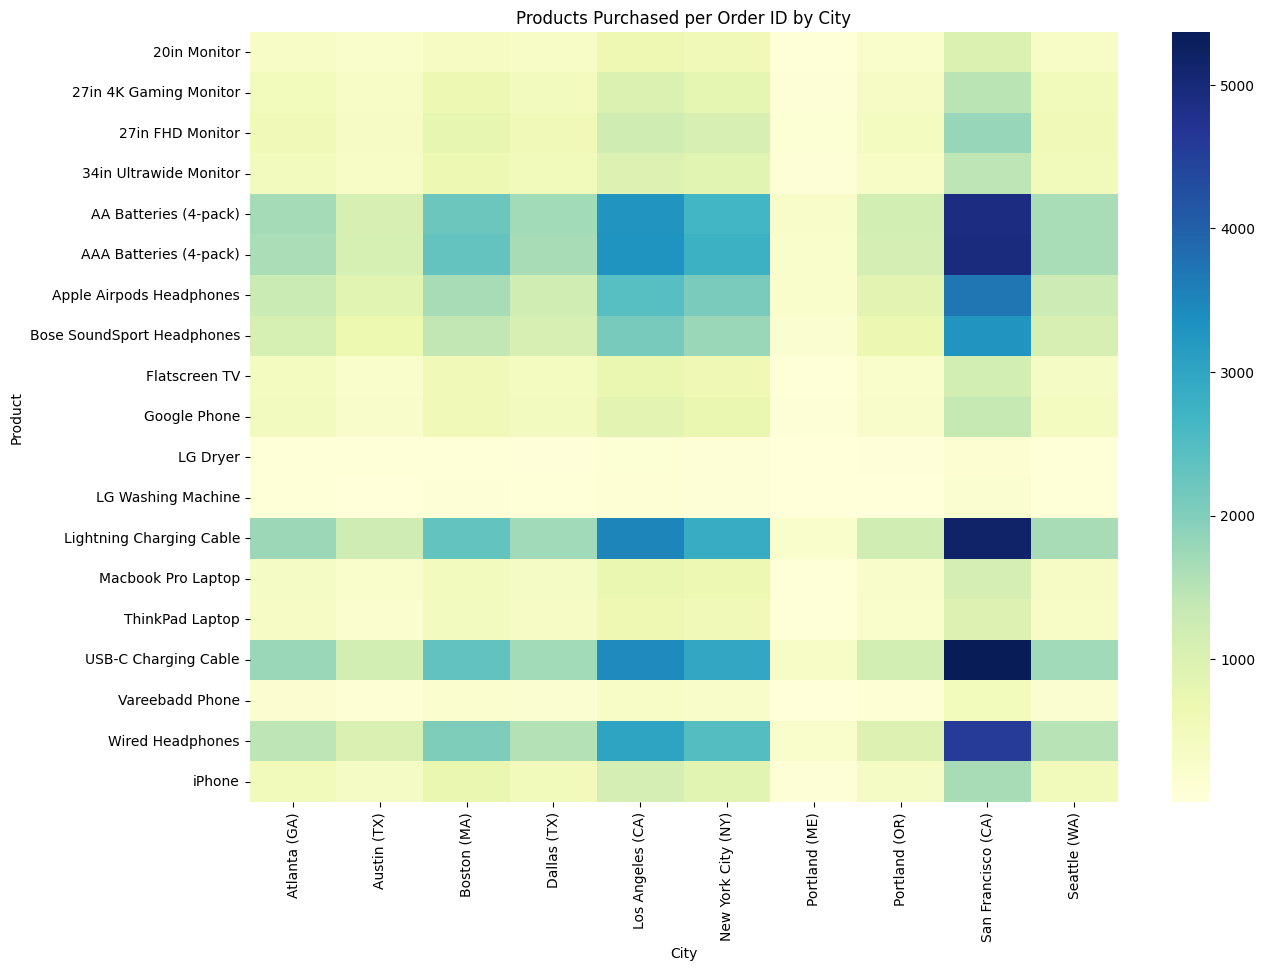

In [87]:
# Plot the products purchased per order ID by city
fig, ax = plt.subplots(figsize=(14, 10))
products_per_order_city = df.pivot_table(index='Product', columns='City', values='Order ID', aggfunc='count', fill_value=0)
sns.heatmap(products_per_order_city, cmap='YlGnBu', ax=ax)
plt.title('Products Purchased per Order ID by City')
plt.xlabel('City')
plt.ylabel('Product')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**Key Insights for City-Specific Product Preferences** - **High-Demand Products in Key Cities:** High-intensity areas in the heatmap reveal products with broad appeal and demand. Certain products see high demand in cities like San Francisco and Los Angeles, especially in categories such as electronics. This trend reflects the purchasing power and consumer interests of these cities. - **Low-Demand Products Across All Cities:** Some products show lower sales volumes across the board, indicating niche appeal (\[Austin, TX\]: monitors, dryer, washing machine; \[Portland, OR\]: laptop, phone). These items coud benefit from bundling strategies or targeted promotions to increase their visibility and appeal. - **Consumer Preferences:** There's a noticeable preference for practical and essential items. Shifts toward eco-friendly or sustainable products may be emerging.

### f/ What insights can be drawn from the density plot of sales by city regarding sales distribution and city-specific spending patterns?

The density plot below illustrates the distribution of sales values across cities, highlighting cities with a wider range of purchase amounts.

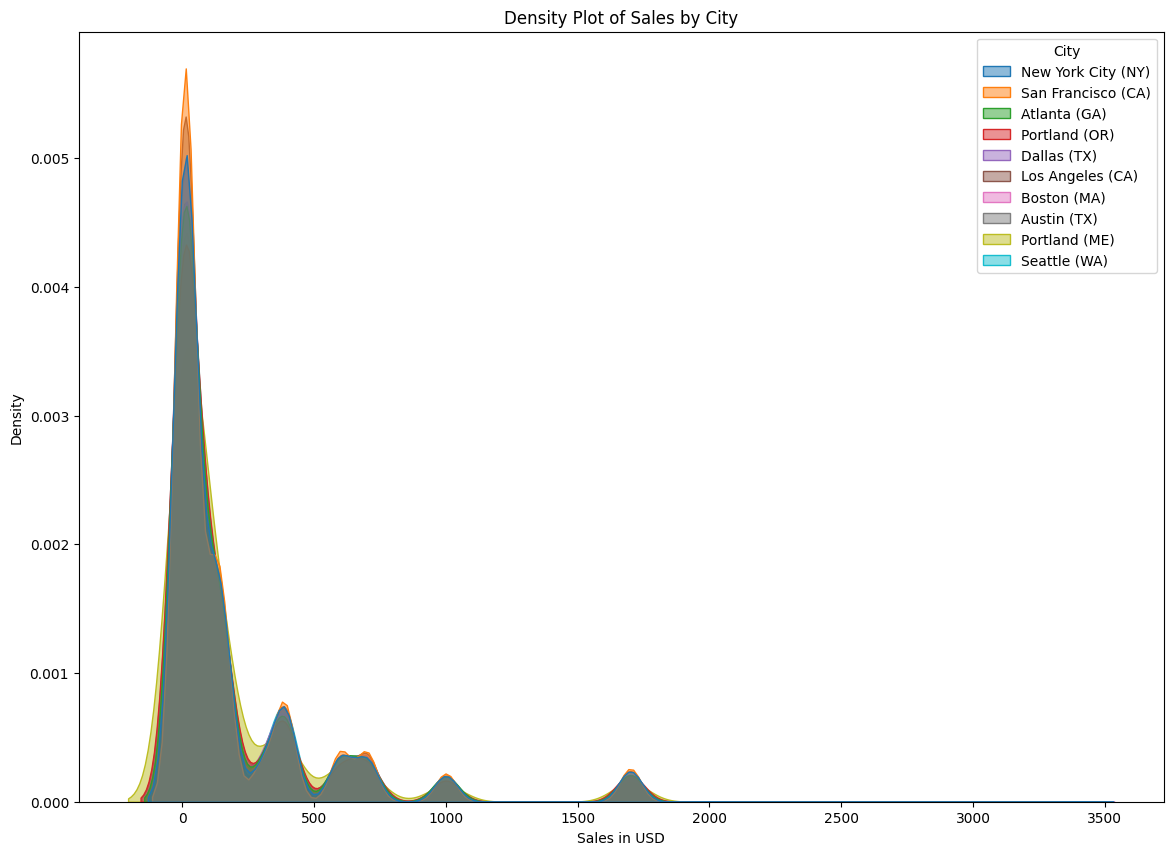

In [88]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.kdeplot(data=df, x='Sales', hue='City', fill=True, common_norm=False, alpha=0.5, ax=ax)
plt.title('Density Plot of Sales by City')
plt.xlabel('Sales in USD')
plt.ylabel('Density')
plt.show()

**Key Insights on Sales Distribution and Spending Patterns by City** - **Diverse Sales Ranges in Major Cities:** Cities like San Francisco and New York City exhibit a wide range of purchase amounts, which suggests a mix of high-value purchases and frequent, lower-value transactions. - **City-Specific Spending Peaks:** Some cities show concentrated sales at specific price points, suggesting common purchasing behaviors and popular price brackets. This insight can guide product pricing strategies to match city-specific spending habits.

### **Key Takeaways City Comparisons**

-   **Growth Opportunities:** For low-performing cities such as Austin and Portland, targeted marketing campaigns and tailored promotions could help boost sales and tap into untapped markets.
-   **City-Specific Product Strategies:** Tailoring product offerings to match each city’s preferences, such as electronics in tech-oriented cities, can drive sales. Adjusting inventory and marketing plans based on seasonal demand fluctuations can help optimize sales, especially in cities with significant seasonal variability.
-   **Quarterly Insights for Inventory Planning:** High-demand items should be well-stocked in top-performing cities, while niche products may require selective stocking or promotion strategies.

### g/ Which products are the most popular, and what common traits do they share?

By analyzing total quantities ordered, we identified the most popular products. These items generally share traits such as **affordable pricing**, high **functionality**, or **seasonal appeal**. For instance, products that address common, everyday needs—like basic electronics or accessories—often have higher order volumes. Additionally, items that fall within moderate price ranges see consistent demand, indicating that affordability plays a role in popularity.

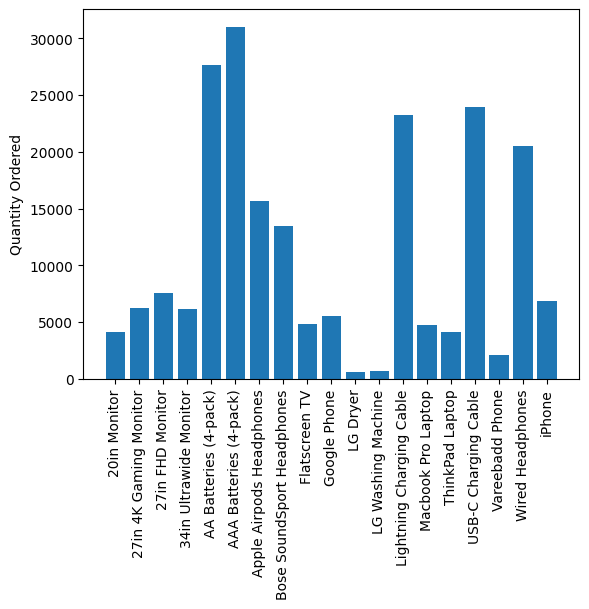

In [89]:
## Quantity Ordered by Product
product_groups = df.groupby('Product')
quantity_ordered = product_groups['Quantity Ordered'].sum()

products = [product for product, df in product_groups]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical')
plt.show()

![Figure Quantity Order by Products](/Output/order_QuantityProduct.png){ @fig-ProductQuantityOrdered }
*Figure 5: Order Quantity by Products*

/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/3934058888.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
/var/folders/9h/ytml0k5s4sd557w30hgm85280000gn/T/ipykernel_5986/3934058888.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


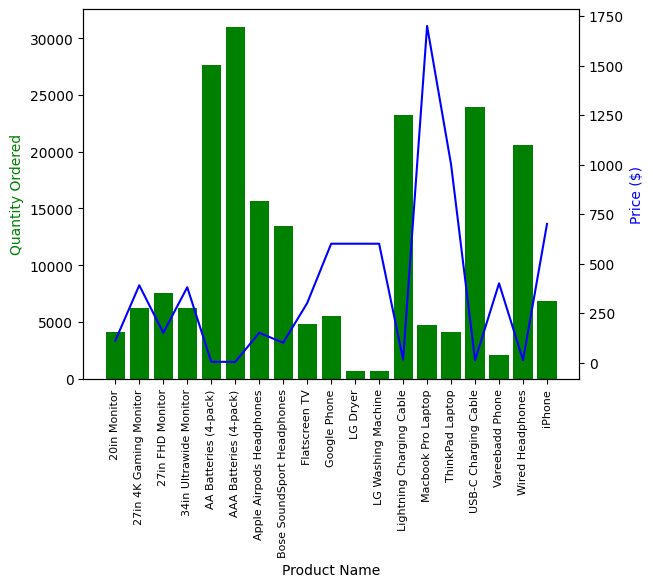

In [90]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

# product_groups = df.groupby('Product')
# quantity_ordered = product_groups['Quantity Ordered'].sum()
products = [product for product, df in product_groups]
prices = product_groups['Price Each'].mean()
order_purchase = df.groupby('Product')['Quantity Ordered'].sum()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, order_purchase, color='g')
# ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

![Figure examining the relationship between price and quantity](/Output/dualAxisBarLinePlot.png){@fig-dualAxisBarAndLinePlot }

*Figure 6: Combination plots to Quantity Orederd and Price Each*

The bar chart visualization of "Quantity Ordered by Product" highlights these high-demand items, showing that **consumer preferences** often favor items with a balanced price-to-value ratio. Products with very high prices may still generate considerable sales revenue but see fewer orders.

For the products popularity, the another visualization of **scatterplot with maker size** suggests that customer demand remains steady for these types of products, with a notable influence of price accessibility on purchasing decisions.

  Order ID                   Product   Sales  Quantity Ordered
0   141234                    iPhone  700.00                 1
1   141235  Lightning Charging Cable   14.95                 1
2   141236          Wired Headphones   23.98                 2
3   141237          27in FHD Monitor  149.99                 1
4   141238          Wired Headphones   11.99                 1


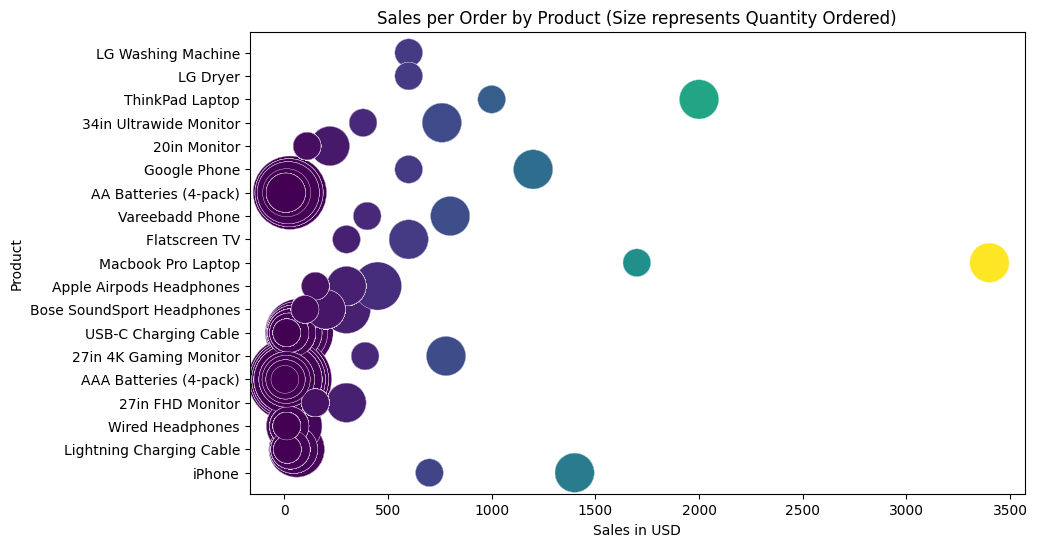

In [91]:
# Scatter Plot with size of sales volumes
order_product_sales = df.groupby(['Order ID', 'Product'])['Sales'].sum().reset_index()
order_product_sales['Quantity Ordered'] = df.groupby(['Order ID', 'Product'])['Quantity Ordered'].sum().reset_index(drop=True)
print(order_product_sales.head())

# Calculate the size of the markers based on the quantity ordered
order_product_sales['Size'] = order_product_sales['Quantity Ordered'].astype(float)

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(order_product_sales['Sales'], order_product_sales['Product'], s=order_product_sales['Size']*400, c=order_product_sales['Sales'], cmap='viridis', edgecolor='w', linewidth=0.25)
plt.ylabel('Product')
plt.xlabel('Sales in USD')
plt.title('Sales per Order by Product (Size represents Quantity Ordered)')
plt.show()

![Figure of Scatter Plot with Marker Size](/Output/scatterPlot_withSalesVolumnSize.png){Combine quantity ordered, sales per order, and color-coded sales values in a single view.}

*Figure 7: Sales per Order by Product*

This scatter plot provides a clear relationship between sales revenue and quanity ordered for each product.

**Key Takeaways Product Popularity**

### h/ What are the specific product attributes (e.g., price, brand, features) that appeal most to our consumers?